# OneHotEncoder in pipeline

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

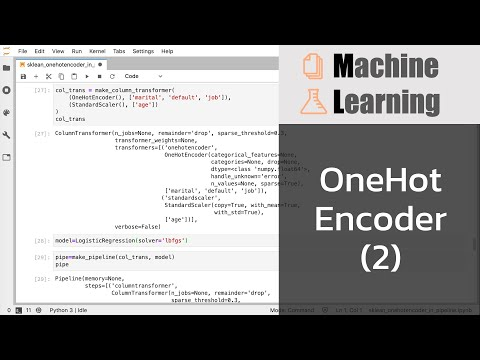

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('4_tdf1ymCPE', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np

import requests
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas version:  {pd.__version__}')

pandas version:  0.25.3


In [4]:
pd.Timestamp.now()

Timestamp('2020-01-03 08:33:40.064826')

# UCI: bank marketing data set

In [5]:
r=requests.get('https://github.com/prasertcbs/basic-dataset/raw/master/bank/bank-names.txt')
print(r.text)

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

In [6]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/bank/bank.csv'
df=pd.read_csv(url, sep=';')
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
import sklearn
print(f'sklearn version = {sklearn.__version__}')

sklearn version = 0.21.3


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [10]:
df['marital']

0       married
1       married
2        single
3       married
4       married
         ...   
4516    married
4517    married
4518    married
4519    married
4520     single
Name: marital, Length: 4521, dtype: object

In [11]:
df[['marital']]

,marital
0,married
1,married
2,single
3,married
4,married
...,...
4516,married
4517,married
4518,married
4519,married


In [12]:
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [13]:
ohenc1=OneHotEncoder(sparse=False)
m1=ohenc1.fit_transform(df[['marital']])
m1

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
ohenc1.categories_

[array(['divorced', 'married', 'single'], dtype=object)]

In [15]:
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [16]:
m1.shape

(4521, 3)

In [17]:
ohenc1.inverse_transform([[0, 1, 0],
                          [1, 0, 0],
                          [0, 0, 1]])

array([['married'],
       ['divorced'],
       ['single']], dtype=object)

In [18]:
ohenc2=OneHotEncoder(sparse=False, drop='first')
m2=ohenc2.fit_transform(df[['marital']])
m2

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [19]:
m2.shape

(4521, 2)

In [20]:
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
ohenc2.categories_

[array(['divorced', 'married', 'single'], dtype=object)]

In [22]:
ohenc2.inverse_transform([[0, 0],
                          [1, 0],
                          [0, 1]])

array([['divorced'],
       ['married'],
       ['single']], dtype=object)

In [23]:
ohenc=OneHotEncoder(sparse=False, drop='first')
m3=ohenc.fit_transform(df[['marital', 'default', 'education']])
m3

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [24]:
m3.shape

(4521, 6)

In [25]:
ohenc.categories_

[array(['divorced', 'married', 'single'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)]

In [26]:
ohenc.inverse_transform([
    [1, 0, 1, 0, 0, 0],
    [1, 0, 1, 1, 0, 0]
])

array([['married', 'yes', 'primary'],
       ['married', 'yes', 'secondary']], dtype=object)

# make pipeline (ColumnTransformer -> Model)

In [27]:
# encoder & transform columns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# pipeline & cross validation
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

In [28]:
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [29]:
col_trans = make_column_transformer(
    (OneHotEncoder(), ['marital', 'default', 'job']),
    (StandardScaler(), ['age'])
)
col_trans

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                                 ['marital', 'default', 'job']),
                                ('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['age'])],
                  verbose=False)

In [30]:
model=LogisticRegression(solver='lbfgs')

In [31]:
pipe=make_pipeline(col_trans, model)
pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['marital', 'default',
                             

In [32]:
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [33]:
X=df[['age', 'marital', 'default', 'job']]
y=df['y']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8917127071823204

In [35]:
accuracy=cross_val_score(pipe, X, y, cv=5)
accuracy

array([0.8839779 , 0.88495575, 0.88495575, 0.88495575, 0.88495575])

In [36]:
accuracy.mean()

0.8847601818804087

In [37]:
ohenc=OneHotEncoder(sparse=False)
m=ohenc.fit_transform(df[['marital', 'default', 'job']])
m

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [38]:
m.shape

(4521, 17)

In [39]:
ohenc.inverse_transform([
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

array([['married', 'yes', 'admin.']], dtype=object)

---

# Bonus: metrics

In [40]:
from sklearn import metrics

In [41]:
predicted = pipe.predict(X_test)
predicted[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [42]:
pipe.predict_proba(X_test)

array([[0.94000161, 0.05999839],
       [0.93356216, 0.06643784],
       [0.91407361, 0.08592639],
       ...,
       [0.90593675, 0.09406325],
       [0.93555861, 0.06444139],
       [0.92447781, 0.07552219]])

In [43]:
metrics.confusion_matrix(y_test, predicted)

array([[807,   0],
       [ 98,   0]])

### scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [44]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()

In [45]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 807
fp = 0
fn = 98
tp = 0


$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [46]:
pipe.score(X_test, y_test)

0.8917127071823204

In [47]:
metrics.accuracy_score(y_test, predicted)

0.8917127071823204

In [48]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94       807
         yes       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905



/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
